<a href="https://colab.research.google.com/github/wangechi-wq/Footballanalysis/blob/main/Copy_of_Football_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Defining the Question

# a) Specifying the Question

Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# b) Defining the Metric for Success

This project will be successful when:We accurately predict the winning team based on the following: 
  a)Home team or away team

  b)The type of tournament 

The model achieves atleast 80% accuracy

Have the lowest RMSE score possible

# c) Understanding the context

# d) Recording the Experimental Design

The project was undertaken using the following design Datasets(Fifa-ranking.csv + results.csv)

Merging datasets

Performing EDA

Feature Engineering

Polynomial Regression

Logistic regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

# e) Data Relevance

The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the outcome of the games

Is the data source a reliable source?

# 2.Reading the Data

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#loading data
df = pd.read_csv('fifa_ranking.csv')
#Previewing the top of the dataset
df.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [3]:
results = pd.read_csv('results.csv')
#Previewing the top of the dataset
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


# 3.Checking the Data

In [4]:
df.shape

(57793, 16)

Fifa ranking dataset contains 57793 rows and 16 columns

In [5]:
results.shape

(40839, 9)

Results dataset contains 40839 rows and 9 columns

In [6]:
#checking the datatypes
df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [7]:
#changing rankdate data type to date 

df['rank_date'] = pd.to_datetime(df['rank_date'])

In [8]:
#preview changes
df.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [9]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [10]:
#changing date column data type to date 

results['date'] = pd.to_datetime(results['date'])

In [11]:
#preview changes
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [12]:
# Identifying the Missing Data
#
df.isnull().sum()


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [13]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

There are no null values in both datasets

In [14]:
df.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [15]:
#checking descriptive statistics of the fifa dataset
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [16]:
#checking descriptive statistics of the results dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# 5.Tidying the Dataset

In [17]:
#checking for duplicates in the fifa dataset
df.duplicated().sum()

37

In [18]:
#dropping duplicates
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df.shape

(57756, 16)

In [19]:
#checking for duplicates in the fifa dataset
results.duplicated().sum()

0

In [20]:
#Droppping columns we do not need

df1 = df.drop(columns=['country_abrv', 'total_points','previous_points', 
                                 'rank_change', 'cur_year_avg','last_year_avg', 'last_year_avg_weighted',
                                 'two_year_ago_avg','three_year_ago_avg','confederation'])
df1.head(3)

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date
0,1,Germany,0.0,0.0,0.0,1993-08-08
1,2,Italy,0.0,0.0,0.0,1993-08-08
2,3,Switzerland,0.0,0.0,0.0,1993-08-08


In [21]:
#Finding the  sum of the both weighted points
df1['weighted'] =  df1['cur_year_avg_weighted'] + df1['two_year_ago_weighted'] + df1['three_year_ago_weighted']
df1.head(3)

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted
0,1,Germany,0.0,0.0,0.0,1993-08-08,0.0
1,2,Italy,0.0,0.0,0.0,1993-08-08,0.0
2,3,Switzerland,0.0,0.0,0.0,1993-08-08,0.0


Weighted points on the fifa  dataset started from 21/09/2011, we will use data from 21/09/2011 onwards for the analysis

In [22]:
df1 = df1[df1['rank_date'] > '2011-08-24']
results = results[results['date'] > '2011-08-24']

In [23]:
#covert columns containing dates to year form
import datetime

df1['year'] = df1['rank_date'].dt.year
df1.tail()

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted,year
57788,206,Anguilla,0.0,0.0,0.0,2018-06-07,0.0,2018
57789,206,Bahamas,0.0,0.0,0.0,2018-06-07,0.0,2018
57790,206,Eritrea,0.0,0.0,0.0,2018-06-07,0.0,2018
57791,206,Somalia,0.0,0.0,0.0,2018-06-07,0.0,2018
57792,206,Tonga,0.0,0.0,0.0,2018-06-07,0.0,2018


In [24]:
results['year'] = results['date'].dt.year
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


The fifa (df) dataset runs from the year 2011 to the year 2018 whereas the results dataset runs to the year 2019. For better results after merging we will remove data for the year 2019 in the results dataset

In [25]:
#removing data for the year 2019
results1 = results[results['year'] < 2019]
results1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [26]:
#Dropping unnecessary columns from fifa/df1 dataset

df2= df1.drop(columns=['cur_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted'])
df2.head()

,rank,country_full,rank_date,weighted,year
40585,1,Spain,2011-09-21,1101.27,2011
40586,2,Netherlands,2011-09-21,1089.24,2011
40587,3,Germany,2011-09-21,829.26,2011
40588,4,Uruguay,2011-09-21,791.79,2011
40589,5,Portugal,2011-09-21,862.16,2011


In [27]:
#Dropping columns for results dataset

results2 = results1.drop(columns=['date','city','neutral'])
results2.tail(3)

,home_team,away_team,home_score,away_score,tournament,country,year
40348,Kyrgyzstan,Palestine,2,1,Friendly,Qatar,2018
40349,Philippines,Vietnam,2,4,Friendly,Qatar,2018
40350,Qatar,Iran,1,2,Friendly,Qatar,2018


Merging the two datasets

In [28]:
#Joining both tables to form one dataset

fperformance = results2.merge(df2, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
fperformance = fperformance.merge(df2, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
fperformance.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
fperformance.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,weighted_x,rank_y,rank_date_y,weighted_y
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93


In [29]:
#Changing column names
fperformance.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'weighted_x':'home_team_weighted_points',
                     'weighted_y':'away_team_weighted_points'}, 
                 inplace=True)
 
fperformance.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

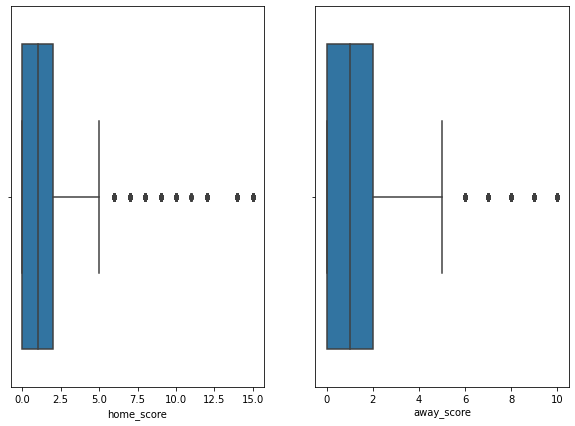

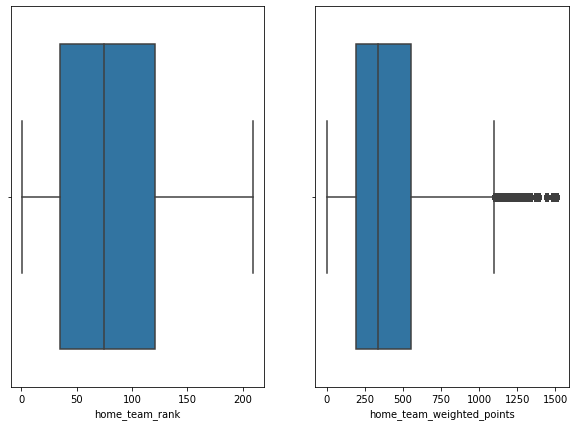

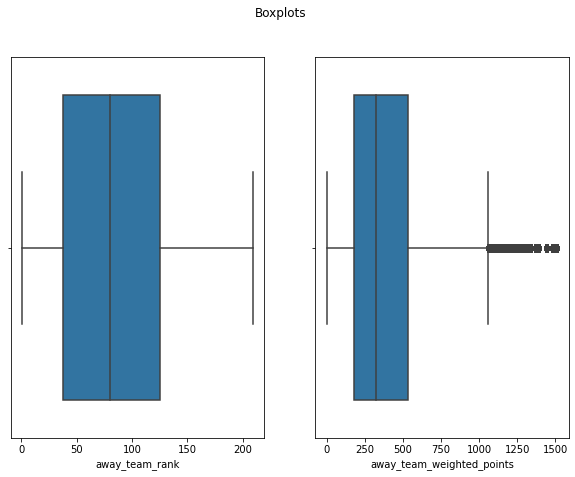

In [30]:
# Checking for Outliers
#
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(10,7))
fig, ((ax3,ax4)) = plt.subplots(1,2, figsize=(10,7))
fig, ((ax5,ax6)) = plt.subplots(1,2, figsize=(10,7))

fig.suptitle('Boxplots')
sns.boxplot(fperformance['home_score'], ax=ax1)
sns.boxplot(fperformance['away_score'], ax=ax2)
sns.boxplot(fperformance['home_team_rank'], ax=ax3)
sns.boxplot(fperformance['home_team_weighted_points'], ax=ax4)
sns.boxplot(fperformance['away_team_rank'], ax=ax5)
sns.boxplot(fperformance['away_team_weighted_points'], ax=ax6)

plt.show()

There are outliers in some columns. We chose not to drop the outliers because they are valuable values for conclusive outcome

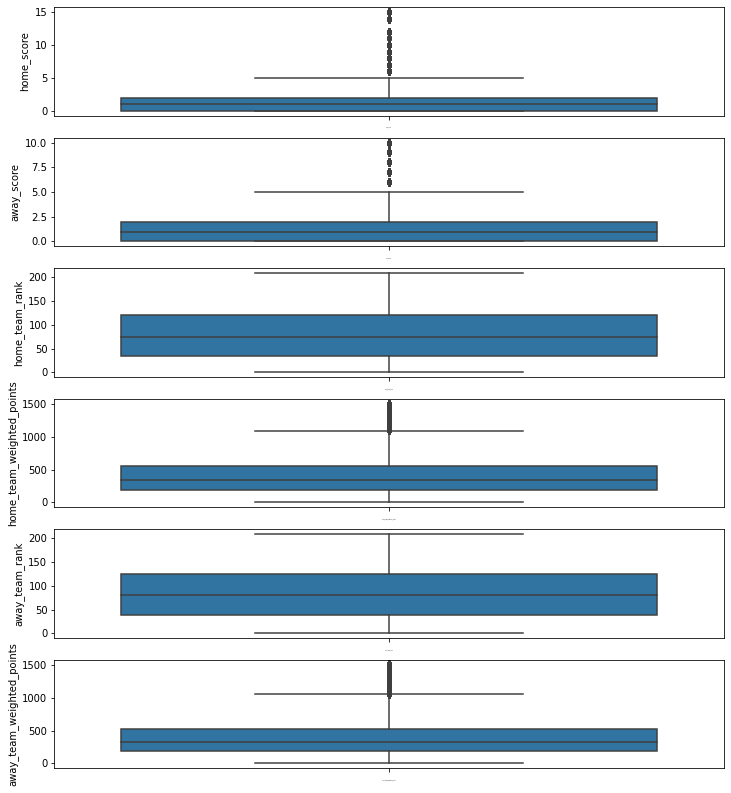

In [31]:
# checking for anomalies
anomalies = ['home_score', 'away_score', 'home_team_rank','home_team_weighted_points','away_team_rank','away_team_weighted_points']
fig, ax = plt.subplots(len(anomalies), figsize=(12,14))

for i, col_val in enumerate(anomalies):

    sns.boxplot(y=fperformance[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=1)

The merged dataset is tidy enough to perform the EDA

4.External Data Source Validation

# a.Validation

# 6.Exploratory Data Analysis

In [32]:
# Finding the measures of central tendencies

for column in anomalies:
  print('\n')
  print(column + ', Mean: '+ str(fperformance[column].mean()))
  print(column + ', Mode: '+ str(fperformance[column].mode()))
  print(column + ', Median: '+ str(fperformance[column].median()))
  print(column + ', Standard deviation: '+ str(fperformance[column].std()))
  print(column + ', Variance: '+ str(fperformance[column].var()))
  print(column + ', Skewness: '+ str(fperformance[column].skew()))
  print(column + ', Kurtosis: '+ str(fperformance[column].kurt()))



home_score, Mean: 1.5315772881712144
home_score, Mode: 0    1
dtype: int64
home_score, Median: 1.0
home_score, Standard deviation: 1.4955483223995165
home_score, Variance: 2.2366647846320085
home_score, Skewness: 1.750145933684526
home_score, Kurtosis: 6.016022079358567


away_score, Mean: 1.0504862984109193
away_score, Mode: 0    0
dtype: int64
away_score, Median: 1.0
away_score, Standard deviation: 1.225942547750592
away_score, Variance: 1.502935130385213
away_score, Skewness: 1.7129496981864978
away_score, Kurtosis: 4.5931989259808494


home_team_rank, Mean: 80.88683199645055
home_team_rank, Mode: 0    1
dtype: int64
home_team_rank, Median: 75.0
home_team_rank, Standard deviation: 53.90528299792047
home_team_rank, Variance: 2905.779535085894
home_team_rank, Skewness: 0.3789405425836709
home_team_rank, Kurtosis: -0.8447059156754793


home_team_weighted_points, Mean: 399.74453092342327
home_team_weighted_points, Mode: 0    0.0
dtype: float64
home_team_weighted_points, Median: 339.26

In [33]:
fperformance.describe()

,home_score,away_score,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
count,685176.000000,685176.000000,685176.000000,685176.000000,685176.000000,685176.000000
mean,1.531577,1.050486,80.886832,399.744531,84.579123,380.868534
std,1.495548,1.225943,53.905283,270.621787,54.272873,263.522564
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,35.000000,194.510000,38.000000,180.550000
50%,1.000000,1.000000,75.000000,339.260000,80.000000,321.740000
75%,2.000000,2.000000,121.000000,556.270000,125.000000,531.290000
max,15.000000,10.000000,209.000000,1511.500000,209.000000,1511.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe50e070990>,
      dtype=object)

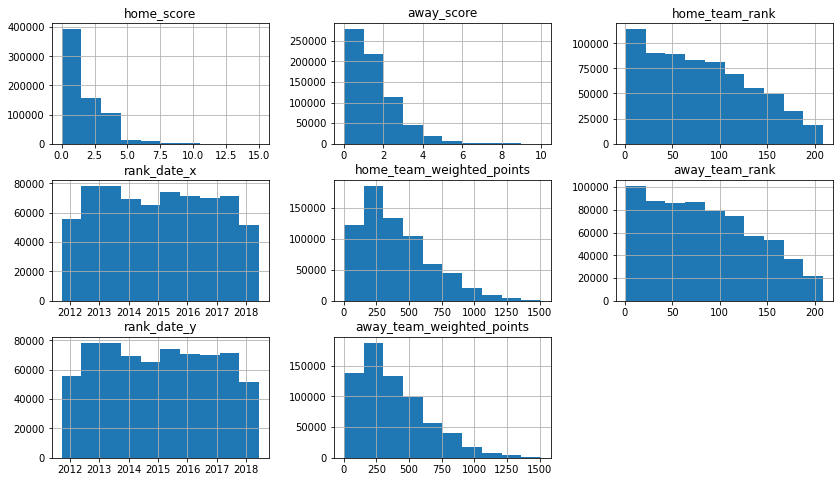

In [34]:
#Checking for the data if its normally distributed
fperformance.hist(bins=10, figsize=[14,8])

From the output,the data does not look gaussian

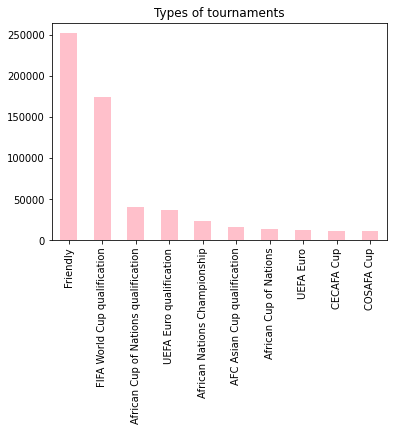

In [35]:
#Checking tournament type value counts
colors= ["pink"]
fperformance.tournament.value_counts().sort_values(ascending=False).head(10).plot(x ='Tournament',
                                                                                  kind = 'bar', title='Types of tournaments',color=colors)


The tournament type Friendly has the highest number of matches

In [36]:
#checking correlation of columns
fperformance.corr()

,home_score,away_score,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
home_score,1.000000,-0.158276,-0.155461,0.165582,0.275123,-0.232428
away_score,-0.158276,1.000000,0.194748,-0.158744,-0.211961,0.229347
home_team_rank,-0.155461,0.194748,1.000000,-0.906133,0.503449,-0.455663
home_team_weighted_points,0.165582,-0.158744,-0.906133,1.000000,-0.466066,0.448750
away_team_rank,0.275123,-0.211961,0.503449,-0.466066,1.000000,-0.909567
away_team_weighted_points,-0.232428,0.229347,-0.455663,0.448750,-0.909567,1.000000


There is a strong negative correlation between rank and weighted points for teams: The teams with very high weighted points rank high and those with low weighted points rank the least

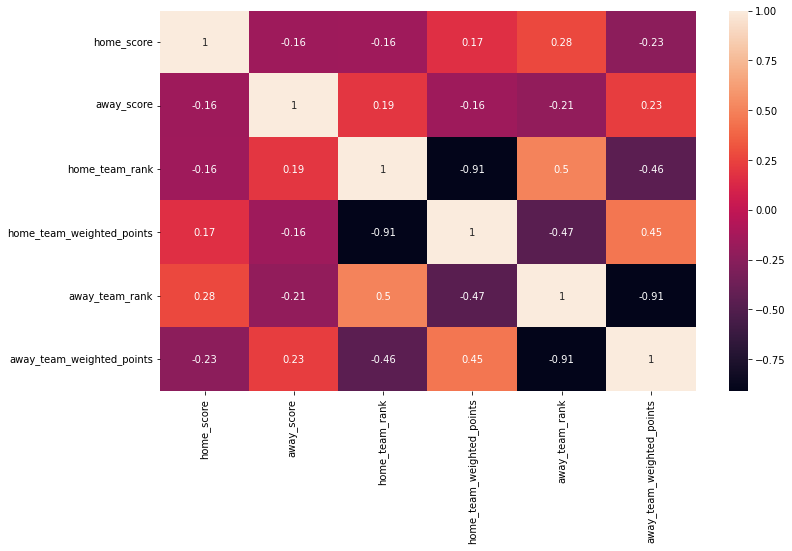

In [37]:
#Checking for feature correlation
plt.subplots(figsize=(12,7))
sns.heatmap(fperformance.corr(), annot=True)

# 7.Feature Engineering

Will create a column scoring which contains results of whether a match was a win, lose or draw from the home team 

In [39]:
#Creating a new column scoring 
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

fperformance['Scoring'] = fperformance.apply(f, axis=1)

print(fperformance.info())
fperformance.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685176 entries, 0 to 685175
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  685176 non-null  object        
 1   away_team                  685176 non-null  object        
 2   home_score                 685176 non-null  int64         
 3   away_score                 685176 non-null  int64         
 4   tournament                 685176 non-null  object        
 5   home_team_rank             685176 non-null  int64         
 6   rank_date_x                685176 non-null  datetime64[ns]
 7   home_team_weighted_points  685176 non-null  float64       
 8   away_team_rank             685176 non-null  int64         
 9   rank_date_y                685176 non-null  datetime64[ns]
 10  away_team_weighted_points  685176 non-null  float64       
 11  Scoring                    685176 non-null  object  

,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points,Scoring
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93,Win
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53,Win
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73,Win
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79,Win
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93,Win


In [40]:
#convert scoring& tournament column datatypes to categories
fperformance['tournament'] = fperformance['tournament'].astype('category')
fperformance['Scoring'] = fperformance['Scoring'].astype('category')
fperformance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685176 entries, 0 to 685175
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  685176 non-null  object        
 1   away_team                  685176 non-null  object        
 2   home_score                 685176 non-null  int64         
 3   away_score                 685176 non-null  int64         
 4   tournament                 685176 non-null  category      
 5   home_team_rank             685176 non-null  int64         
 6   rank_date_x                685176 non-null  datetime64[ns]
 7   home_team_weighted_points  685176 non-null  float64       
 8   away_team_rank             685176 non-null  int64         
 9   rank_date_y                685176 non-null  datetime64[ns]
 10  away_team_weighted_points  685176 non-null  float64       
 11  Scoring                    685176 non-null  category

In [41]:
#convert categorical data to numerical using the label encoder technique

from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder()  
fperformance['Scoring']= label_encoder.fit_transform(fperformance['Scoring']) 
print(fperformance['Scoring'].unique()) 
fperformance.head(5)


[2 0 1]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points,Scoring
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93,2
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53,2
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73,2
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79,2
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93,2



0 represents a draw
1 represents a lose
2 represents a win

In [42]:
# Encode labels in touranament colum 
fperformance['tournament']= label_encoder.fit_transform(fperformance['tournament']) 
  
print(fperformance['tournament'].unique()) 
fperformance.head()

[22 21 10  7 32 31  0 36 18 33  6 34  8 40 35 17  3  5 19 28 26 39  9 12
 11 30 24  2  4 13 14 29 23 38 20 41  1 15 27 16 37 25]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points,Scoring
0,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,100,2011-09-21,291.93,2
1,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,92,2011-10-19,305.53,2
2,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,95,2011-11-23,333.73,2
3,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,93,2011-12-21,314.79,2
4,United Arab Emirates,Qatar,3,1,22,113,2011-10-19,169.00,100,2011-09-21,291.93,2


#Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.
We will separate our fperformance into two to prepare it for modelling using both models

In [43]:
# choosing columns relevant to the analysis question
#
final = fperformance[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank']]

# Previewing the first five rows of the dataset
#
final.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,United Arab Emirates,Qatar,3,1,22,112,100
1,United Arab Emirates,Qatar,3,1,22,112,92
2,United Arab Emirates,Qatar,3,1,22,112,95
3,United Arab Emirates,Qatar,3,1,22,112,93
4,United Arab Emirates,Qatar,3,1,22,113,100


In [44]:
#Checking for multicollinearity
correl = final.drop('home_score', axis = 1).corr()
correl

,away_score,tournament,home_team_rank,away_team_rank
away_score,1.000000,0.026966,0.194748,-0.211961
tournament,0.026966,1.000000,-0.196236,-0.196578
home_team_rank,0.194748,-0.196236,1.000000,0.503449
away_team_rank,-0.211961,-0.196578,0.503449,1.000000


The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.

In [45]:
#performing vif
final_vif = pd.DataFrame(np.linalg.inv(correl.values), index = correl.index, columns = correl.columns)
final_vif

,away_score,tournament,home_team_rank,away_team_rank
away_score,1.200906,-0.031112,-0.488990,0.494610
tournament,-0.031112,1.054898,0.150010,0.125253
home_team_rank,-0.488990,0.150010,1.556518,-0.857786
away_team_rank,0.494610,0.125253,-0.857786,1.561311


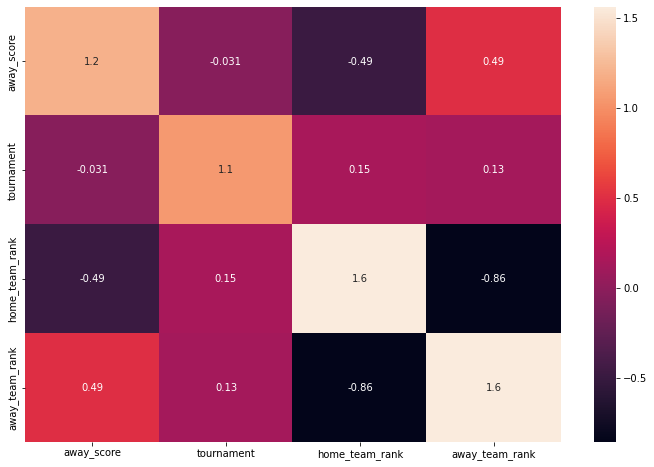

In [46]:
#visualizing the vif using a heatmap

plt.figure(figsize = (12, 8))
sns.heatmap(final_vif, annot = True)
plt.show()

scores less than 5, indicate there is no multicollinearity

creating the model

In [47]:
#Import the necessary libaries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [48]:
# Creating X and y variables
#
X = final.iloc[:, [0, 1, 3, 4, 5, 6]]
y = final.home_score

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.171411744357638


The RMSE score for the model is quite high hence low predictive capability 

# Performing hyperparameter tuning

In [49]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.model_selection import KFold

In [50]:
# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression()

In [51]:
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation using 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'The best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

The best score is -1631505961295633.8 and the best parameters are {'fit_intercept': False, 'normalize': True}


Performing cross validation to check for overfitting or underfitting

In [52]:
# Performing cross validation of 5 folds
#
score = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(score.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(score.std(), 3)}')



Mean of cross validation scores is 5.22358661010474e+18
Standard deviation of the cross validation scores is 1.0438269621853696e+19


both above mean and standard deviation of the model are fairly stable since it is almost close to the original mean

Using residual plot to check the appropriatness of the model

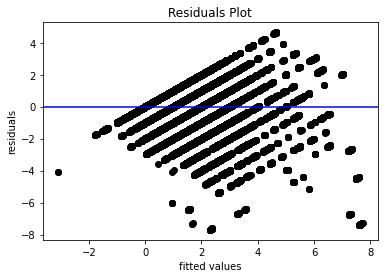

In [53]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residuals Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

The residuals are centered around the mean that is which is close to 0. This shows that the model is quite good

In [54]:
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  1.171411744357638
The residual mean score for the model :  0.007872422990681466


# Checking for Heteroskedasticity using Barlette's Test

In [55]:
# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 9246.81 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


Model 2. Predict away team score

In [66]:
#Checking for multicollinearity
corre = final.drop('away_score', axis = 1).corr()
corre

,home_score,tournament,home_team_rank,away_team_rank
home_score,1.000000,-0.020307,-0.155461,0.275123
tournament,-0.020307,1.000000,-0.196236,-0.196578
home_team_rank,-0.155461,-0.196236,1.000000,0.503449
away_team_rank,0.275123,-0.196578,0.503449,1.000000


In [67]:
#performing vif
vif = pd.DataFrame(np.linalg.inv(corre.values), index = corre.index, columns = corre.columns)
vif

,home_score,tournament,home_team_rank,away_team_rank
home_score,1.236819,0.005901,0.487803,-0.584702
tournament,0.005901,1.054121,0.139669,0.135277
home_team_rank,0.487803,0.139669,1.549800,-0.886996
away_team_rank,-0.584702,0.135277,-0.886996,1.634015


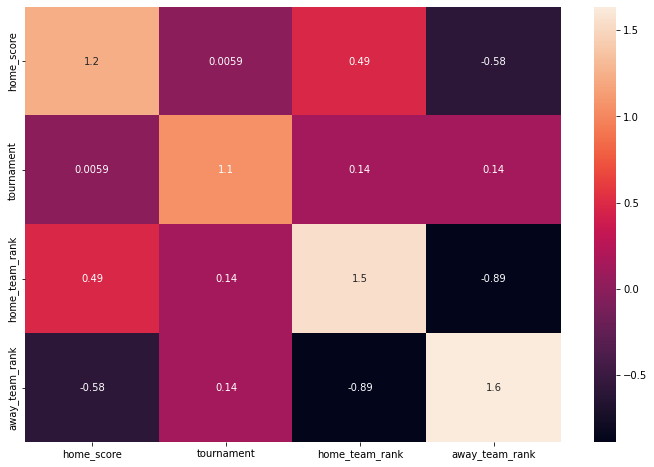

In [68]:
#visualizing the vif using a heatmap

plt.figure(figsize = (12, 8))
sns.heatmap(vif, annot = True)
plt.show()

scores less than 5, indicate there is no multicollinearity

creating the model

In [70]:
# Creating X and y variables
#
X = final.iloc[:, [0, 1, 2, 4, 5, 6]]
y = final.away_score

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.0020856486646021


The RMSE score for the model is quite fair for predictive capability

In [71]:
# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression()

In [72]:
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation using 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_fit = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_results = grid_fit.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'The best score is {grid_fit.best_score_} and the best parameters are {grid_fit.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

The best score is -9124033985771.996 and the best parameters are {'fit_intercept': False, 'normalize': True}


In [73]:
# Performing cross validation of 5 folds
#
fscore = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(fscore.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
#print(f'Standard deviation of the cross validation scores is {np.round(fscore.std(), 3)}')


Mean of cross validation scores is 5.05646864200972e+16
Standard deviation of the cross validation scores is 7.485466965379923e+16


above mean  of the model is fairly stable since it is almost close to the original mean

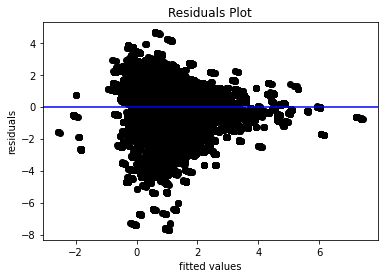

In [74]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
res = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residuals Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= res.mean(), color='blue')
plt.show()

The most residuals are centered around the mean that is which is close to 0. This shows that the model is quite good

In [76]:
# Let's describe our residual:
pd.DataFrame(res).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", res.mean())

The RMSE score for the model :  1.0020856486646021
The residual mean score for the model :  0.002068548736231559


Checking for Heteroskedasticity using Barlette's Test

In [77]:
# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, res)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 20374.24 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


## Approach 2: Using Logistic Regression.

In [56]:
# choosing columns relevant to the analysis question
#
fin = fperformance[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank','Scoring']]

fin.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,Scoring
0,United Arab Emirates,Qatar,3,1,22,112,100,2
1,United Arab Emirates,Qatar,3,1,22,112,92,2
2,United Arab Emirates,Qatar,3,1,22,112,95,2
3,United Arab Emirates,Qatar,3,1,22,112,93,2
4,United Arab Emirates,Qatar,3,1,22,113,100,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


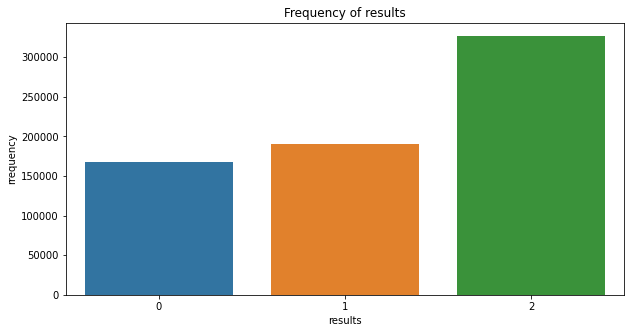

In [57]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 5))
ax = sns.countplot(fin.Scoring)
plt.ylabel('frequency')
plt.xlabel('results')
plt.title('Frequency of results')
plt.show()



0 represents a draw 1 represents a lose 2 represents a win and the diffrence between the scores is balanced off well

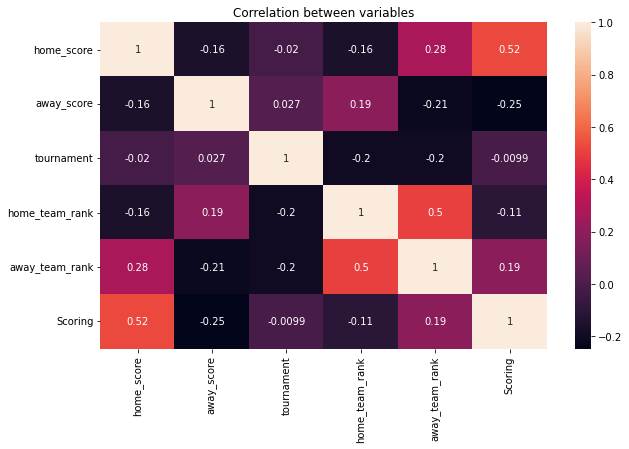

In [58]:
#Visualizing the corr using a heatmap
#
plt.figure(figsize = (10, 6))
sns.heatmap(fin.corr(), annot = True) 
plt.title('Correlation between variables')
plt.show()

Using Logistic Regression model

In [59]:
# Splitting the data into features and the target variable
#

from sklearn.linear_model import LogisticRegression
X = fin.drop('Scoring', axis = 1)
y = fin.Scoring

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Hyperparameter tuning

In [60]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression()

In [65]:
# Creating a dictionary of parameters to be tuned
#
parameters = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()


# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = parameters, cv = 5, scoring = 'accuracy')



In [62]:
# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [63]:
# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 1.0 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


From above, it is seen that the best parameters are {'C': 1.0, 'penalty': 'l2'} L2 works very well to avoid over-fitting issue

We can see that logistic reggresion has the highest accuracy

# Conclusion

Polynomial Regression and Logistic Regression do not really provide an accurate model to predict the FIFA outcomes hence other Modelling techniques should be considered